In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from os.path import join as oj

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import analyze_utils

save_dir = '/home/chansingh/mntv1/iprompt_revision_xmas/'

# r = analyze_utils.load_results_and_cache_autoprompt_json(save_dir, save_file='r.pkl')
r = pd.read_pickle(oj(save_dir, 'r.pkl'))

In [12]:
group_keys = ['model_cls', 'task_name', 'num_learned_tokens', 'n_shots', 'checkpoint', 'seed']
# metric = 'prefix_test_acc'
d = r[r.n_shots > 1]
with pd.option_context('display.max_rows', None):
    # display(r.groupby(group_keys)['prefixes'].max())
    display(d.groupby(group_keys).first()[['prefixes']].sort_values(by=['model_cls', 'task_name']).iloc[::-1])

prefixes
model_cls  task_name                                          num_learned_tokens n_shots checkpoint              seed                                                   
iprompt    word_in_context                                    6                  5       google/flan-t5-xl       2                                 Answer: same, not the
                                                                                                                 1                                  Prompt: Request that
                                                                                         EleutherAI/gpt-j-6B     3                                        Same,not.  You
                                                                                                                 2                                    Same vs Not Same ?
                                                                                                                 1                                   Same and Not-Same -
           translation_en-fr                                  6                  5       google/flan-t5-xl       2                                Name a French word for
                                                                                                                 1                                     Prompt: Which one
                                                                                         EleutherAI/gpt-j-6B     3                           What is the French word for
                                                                                                                 2                      For each of the following French
                                                                                                                 1                                         Prenom : Nom 
           translation_en-es                                  6                  5       google/flan-t5-xl       2                                     Answer: sophie is
                                                                                                                 1                               span <unk> word in span
                                                                                         EleutherAI/gpt-j-6B     3               please write English meaning in Spanish
                                                                                                                 2                                   Buscar palabras que
                                                                                                                 1                           What's the English word for
           translation_en-de                                  6                  5       google/flan-t5-xl       2                                    Vokabeln: Übergang
                                                                                                                 1                         Übersetzung into the Tat, die
                                                                                         EleutherAI/gpt-j-6B     3                        You are a lawyer practicing in
                                                                                                                 2                                          1  2 | Bitte
                                                                                                                 1                                           "Einige" is
           taxonomy_animal                                    6                  5       google/flan-t5-xl       2                                  Answer: yellow.Input
                                                                                                                 1                               Name all four kinds of 
                                                                                         EleutherAI/gpt-

In [4]:
r.groupby(['model_cls', 'task_name', 'num_learned_tokens', 'n_shots', 'checkpoint'])['prefixes__check_answer_func'].max()

model_cls   task_name          num_learned_tokens  n_shots  checkpoint         
autoprompt  active_to_passive  6                   5        EleutherAI/gpt-j-6B    False
            add_two            6                   5        EleutherAI/gpt-j-6B     True
            antonyms           6                   5        EleutherAI/gpt-j-6B    False
            cause_and_effect   6                   5        EleutherAI/gpt-j-6B     True
            common_concept     6                   5        EleutherAI/gpt-j-6B    False
                                                                                   ...  
iprompt     translation_en-es  6                   5        google/flan-t5-xl      False
            translation_en-fr  6                   5        EleutherAI/gpt-j-6B     True
                                                            google/flan-t5-xl       True
            word_in_context    6                   5        EleutherAI/gpt-j-6B     True
                              

In [5]:
r.groupby(['model_cls', 'task_name', 'num_learned_tokens', 'n_shots'])['prefix_test_acc'].max()

KeyError: 'Column not found: prefix_test_acc'

In [4]:
from typing import Dict
def make_legend__autoprompt(r: Dict) -> str:
    cs = ' (human-verified)' if r['prefixes__check_answer_func'] else ''
    return r['model_cls'].capitalize() + cs
    # ts = f'({r["num_learned_tokens"]} tokens)'
    # return ' '.join(
    #     (r['model_cls'].capitalize(), ts)
    # )


def get_hue__autoprompt(r: Dict) -> str:
    if r['model_cls'] == 'autoprompt':
        return '#f7fbff' if r['prefixes__check_answer_func'] else '#c6dbef'
    elif r['model_cls'] == 'genetic':
        return '#4c1d4b' if r['prefixes__check_answer_func'] else '#e83f3f'
    else:
        raise ValueError(f'unknown model_cls {r["model_cls"]}')

r['legend'] = r.apply(make_legend__autoprompt, axis=1)
r['hue'] = r.apply(get_hue__autoprompt, axis=1)

ValueError: unknown model_cls iprompt

<AxesSubplot:xlabel='num_learned_tokens', ylabel='prefix_test_acc'>

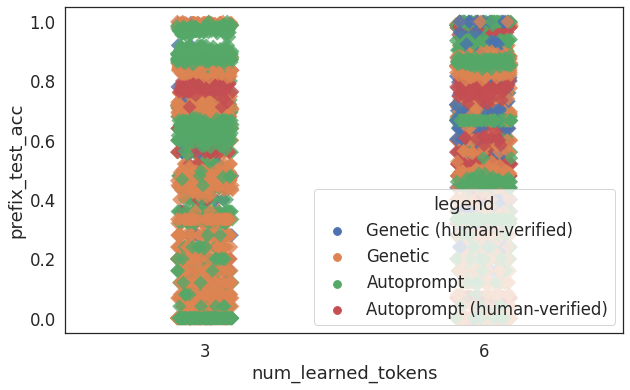

In [200]:
import seaborn as sns
sns.set(style='white', font_scale=1.5)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.stripplot(
    data=r, y='prefix_test_acc', x='num_learned_tokens', hue='legend', size=10, alpha=0.8, marker="D"
)

<AxesSubplot:>

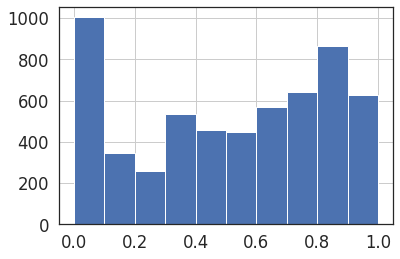

In [201]:
r['prefix_test_acc'].hist()

In [202]:
r[(r["model_cls"] == "genetic")].sort_values(by="prefix_test_acc", ascending=False)[["prefix_test_acc", "prefixes"]].iloc[:10]

,prefix_test_acc,prefixes
4,1.0,What happens if we double/
1,1.0,"Write a function named ""double"
67,1.0,write a function called doubleTo
66,1.0,write a function called double_
65,1.0,"Write a function named ""double"
64,1.0,write a function called double that
11,1.0,How to calculate sum of all
10,1.0,How to calculate sum of list
74,1.0,How to calculate sum of list
75,1.0,How to calculate sum of all


In [203]:
r[(r["model_cls"] == "autoprompt")].sort_values(by="prefix_test_acc", ascending=False)[["prefix_test_acc", "prefixes"]].iloc[:10]

,prefix_test_acc,prefixes
27,1.0,multiplythe hypot indeftheirl
9,1.0,multiplythe hypot newcomtheirl
64,1.0,�Multthe
33,1.0,multiplythe hypot paralletheirl
30,1.0,multiplythe hypot multittheirl
21,1.0,ADDthe introduced Semireat contraceptives
0,1.0,multiplythe hypot Norttheirl
1,1.0,multiplythe hypotNintheirl
2,1.0,multiplythe hypot handctheirl
3,1.0,multiplythe hypot————————————————theirl


Text(0, 0.5, 'Task name')

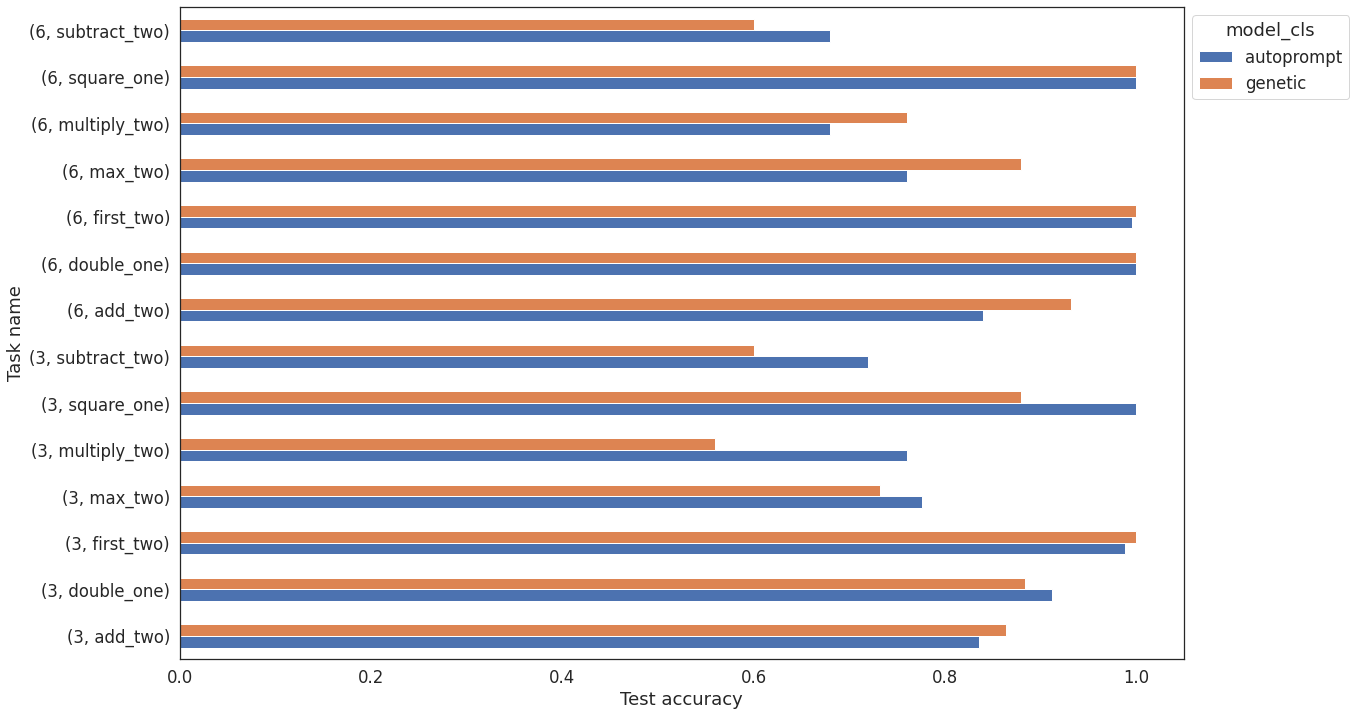

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = r.groupby(['model_cls', 'num_learned_tokens', 'task_name']).max().unstack(0)['prefix_test_acc'].plot.barh(figsize=(18,12))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("")
ax.set_xlabel("Test accuracy")
ax.set_ylabel("Task name")

In [206]:
r['prefix_type'].value_counts()

topk_all                           3430
topk_with_different_start_token    2320
Name: prefix_type, dtype: int64

Text(0, 0.5, 'Prompt test accuracy')

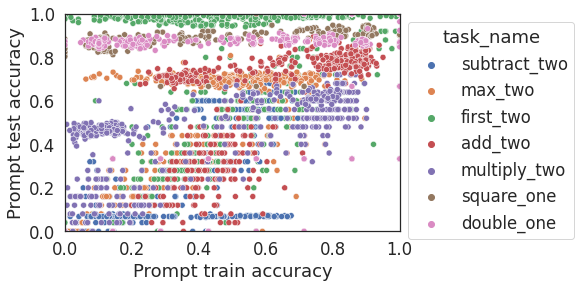

In [249]:
r_top_prefixes = r[r['prefix_type'] == 'topk_all']
ax = sns.scatterplot(data=r_top_prefixes, x='prefix_train_acc', y='prefix_test_acc', hue='task_name')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# # add identity line
# import numpy as np
# x = np.arange(0, 1, 0.01)
# plt.plot(x=x, y=x, ax=ax, kind='line')


# format plot
ax.set_title("")
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xlabel(xlabel="Prompt train accuracy")
ax.set_ylabel(ylabel="Prompt test accuracy")

Text(0, 0.5, 'Prompt test accuracy')

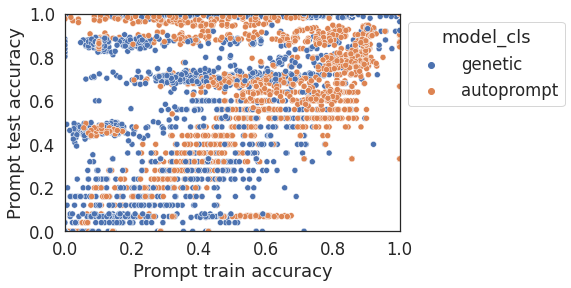

In [209]:
r_top_prefixes = r[r['prefix_type'] == 'topk_all']
ax = sns.scatterplot(data=r_top_prefixes, x='prefix_train_acc', y='prefix_test_acc', hue='model_cls')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# add identity line


# format plot
ax.set_title("")
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xlabel(xlabel="Prompt train accuracy")
ax.set_ylabel(ylabel="Prompt test accuracy")

In [208]:
r[(r['prefix_test_acc'] > 0.5) & (r['prefix_train_acc'] < 0.2)][['prefix_train_acc', 'prefix_test_acc', 'prefixes']]

,prefix_train_acc,prefix_test_acc,prefixes
39,0.091383,0.600,x - integer
54,0.184091,0.680,Given any number
103,0.091383,0.600,x - integer
118,0.184091,0.680,Given any number
15,0.102679,0.724,Enter 3 or
...,...,...,...
67,0.101562,0.868,placedthethepathe Pap
69,0.101562,0.864,assistantsthethepathe Pap
70,0.101562,0.864,gullthethepathe Pap
71,0.101562,0.868,beliethethepathe Pap


## Check runtimes

Text(0.5, 0, 'Method')

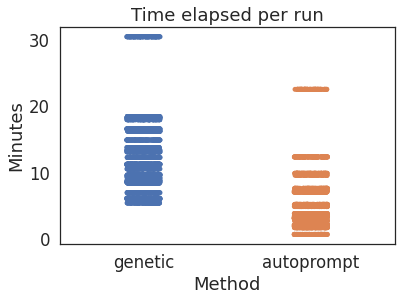

In [221]:
# time.time() returns time-since-the-epoch in seconds, this is a difference
# in calls to time.time(), so it's the number of seconds elapsed. let's plot
# minutes
r['train_time_elapsed_minutes'] = (r['train_time_elapsed'] / 60)
ax = sns.stripplot(data=r, y='train_time_elapsed_minutes', x='model_cls')
ax.set_title("Time elapsed per run")
ax.set_ylabel("Minutes")
ax.set_xlabel("Method")

Text(0.5, 0, '# shots')

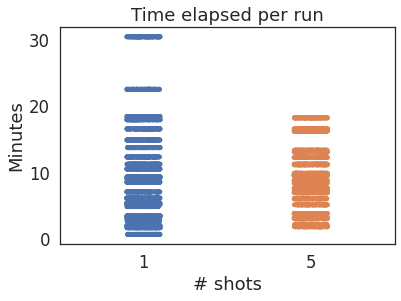

In [222]:
# time.time() returns time-since-the-epoch in seconds, this is a difference
# in calls to time.time(), so it's the number of seconds elapsed. let's plot
# minutes
r['train_time_elapsed_minutes'] = (r['train_time_elapsed'] / 60)
ax = sns.stripplot(data=r, y='train_time_elapsed_minutes', x='n_shots')
ax.set_title("Time elapsed per run")
ax.set_ylabel("Minutes")
ax.set_xlabel("# shots")

Text(0.5, 0, '# shots')

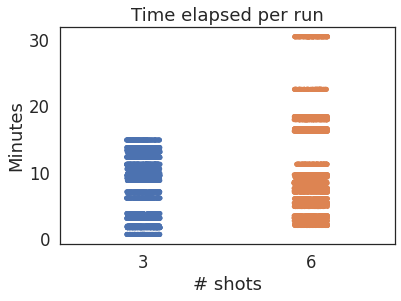

In [225]:
# time.time() returns time-since-the-epoch in seconds, this is a difference
# in calls to time.time(), so it's the number of seconds elapsed. let's plot
# minutes
r['train_time_elapsed_minutes'] = (r['train_time_elapsed'] / 60)
ax = sns.stripplot(data=r, y='train_time_elapsed_minutes', x='num_learned_tokens')
ax.set_title("Time elapsed per run")
ax.set_ylabel("Minutes")
ax.set_xlabel("# shots")

<AxesSubplot:>

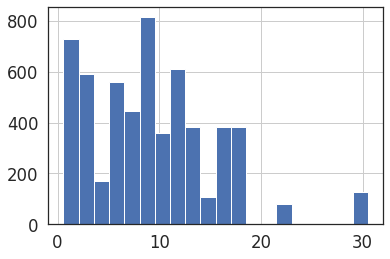

In [227]:
(r['train_time_elapsed'] / 60).hist(bins=20)